In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
a = np.random.randint(4,size = (5,5))
a

array([[2, 0, 3, 3, 1],
       [1, 2, 3, 3, 2],
       [2, 2, 3, 2, 1],
       [2, 0, 3, 0, 0],
       [2, 1, 0, 2, 2]])

In [3]:
# a[[0,3,4],3:]
# a[: 3:]
# a[: : ]
a[1 :]

array([[1, 2, 3, 3, 2],
       [2, 2, 3, 2, 1],
       [2, 0, 3, 0, 0],
       [2, 1, 0, 2, 2]])

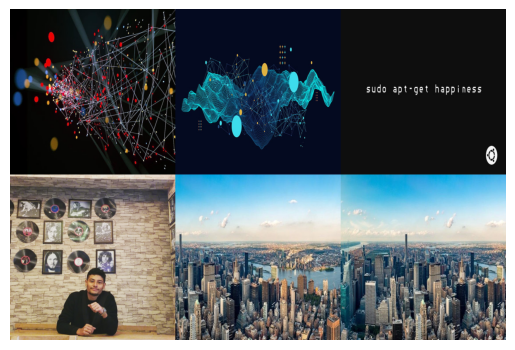

In [4]:
import os
from PIL import Image

image_directory = '/home/gpaudel/Documents/images/'

image_files = os.listdir(image_directory)
num_of_images = len(image_files)

images_per_row = int(np.ceil(np.sqrt(num_of_images)))
images_per_column = int(np.ceil(num_of_images / images_per_row))

images = []
max_width = 0
max_height = 0

for i, image_file in enumerate(image_files):

    image_path = os.path.join(image_directory, image_file)
    image = Image.open(image_path)

    image = image.resize((400, 400))

    image = np.array(image)
    images.append(image)

    max_width = max(max_width, image.shape[1])
    max_height = max(max_height, image.shape[0])
    

grid_width = images_per_row * max_width
grid_height = images_per_column * max_height

grid = np.empty((images_per_column, images_per_row), dtype=np.ndarray)

for i, image in enumerate(images):
    row = i // images_per_row
    col = i % images_per_row
    grid[row, col] = image

hori_concat = [np.hstack(grid[row, :]) for row in range(images_per_column)]
image_grid = np.vstack(hori_concat)

plt.imshow(image_grid)
plt.axis('off')
plt.show()
